# **Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# **Loading and exploding the DataSet**
    - Understand the structure and summary of the dataset.

In [5]:
# Step 1: Loading the Data
df = pd.read_csv(r"C:\Users\Dell\Downloads\user_behavior_dataset.csv")
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


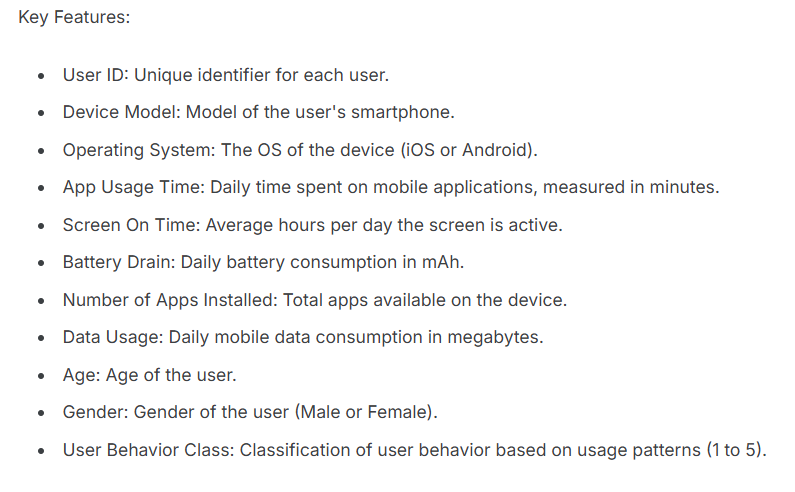

In [8]:
# Step 2: Data Overview
print("Dataset Information:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None

First 5 Rows:
   User ID    Device Model Operating System  App U

<Axes: >

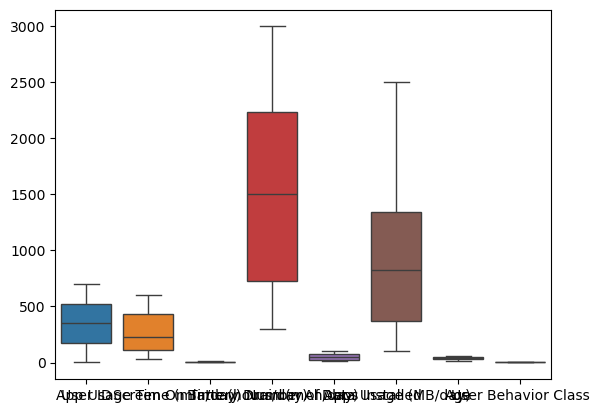

In [10]:
sns.boxplot(df)

In [12]:
df.drop(columns = ['User ID'],inplace = True)

# **Preprocessing the Data**
    - Handle missing values, encode categorical features, and scale numerical data.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


In [17]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,OneHotEncoder

In [21]:
cont_pl = Pipeline(steps=[('Scaling',MinMaxScaler()),
                         ('Transformation', PowerTransformer(standardize=False))])

cat_nominal_pl = Pipeline(steps = [('OneHotEncoding',OneHotEncoder(drop = 'first',sparse_output = False, handle_unknown='ignore'))])

In [23]:
from sklearn.compose import ColumnTransformer

In [25]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [27]:
df['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

In [29]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

In [31]:
# Step 7: Define Features and Target
X = df.drop('User Behavior Class', axis=1)
y = df['User Behavior Class']

In [33]:
ct = ColumnTransformer(transformers=[('Cont Col transform',cont_pl, [2,3,4,5,6,7]),
                                    ('Categoricel transform',cat_nominal_pl,[0,1,8])],
                                     remainder = 'passthrough')

In [35]:
# Step 8: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_transformed = pd.DataFrame(ct.fit_transform(X_train),columns = ct.get_feature_names_out(),index = X_train.index)
X_test_transformed = pd.DataFrame(ct.transform(X_test),columns = ct.get_feature_names_out(),index = X_test.index)

In [37]:
y_train

82     4
51     3
220    4
669    2
545    1
      ..
71     5
106    2
270    4
435    2
102    2
Name: User Behavior Class, Length: 560, dtype: int64

# **Build and Train the model**
    - Train a Random Forest Classifier to predict the `User Behavior Class`.

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [42]:
final_pl = Pipeline(steps = [('Preprocessing',ct),
                            ('Estimator',rf)])

In [44]:
final_pl

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cont Col transform',
                                                  Pipeline(steps=[('Scaling',
                                                                   MinMaxScaler()),
                                                                  ('Transformation',
                                                                   PowerTransformer(standardize=False))]),
                                                  [2, 3, 4, 5, 6, 7]),
                                                 ('Categoricel transform',
                                                  Pipeline(steps=[('OneHotEncoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [0, 1, 8])])),
                ('Estimator', RandomForestClassifier())])

In [46]:
final_pl.fit(X_train,y_train)
y_pred_pl = final_pl.predict(X_test)

In [48]:
import pickle

In [50]:
pickle.dump(final_pl,open('rfc.pkl','wb'))

In [52]:
pr = pickle.load(open('rfc.pkl','rb'))

In [54]:
pr

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cont Col transform',
                                                  Pipeline(steps=[('Scaling',
                                                                   MinMaxScaler()),
                                                                  ('Transformation',
                                                                   PowerTransformer(standardize=False))]),
                                                  [2, 3, 4, 5, 6, 7]),
                                                 ('Categoricel transform',
                                                  Pipeline(steps=[('OneHotEncoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [0, 1, 8])])),
                ('Estimator', RandomForestClassifier())])

In [56]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [58]:
pr.predict([['Google Pixel 5','Android',393,6.4,1872,67,1122,40,'Male']])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

# **Evaluating the model**
     - Evaluate the model using accuracy, a classification report, and a confusion matrix.

In [65]:
# Step 10: Evaluate the Model
y_pred = rf.predict(X_test_transformed)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [67]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [69]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [71]:
# Set visualization style
sns.set(style="whitegrid", palette="pastel")


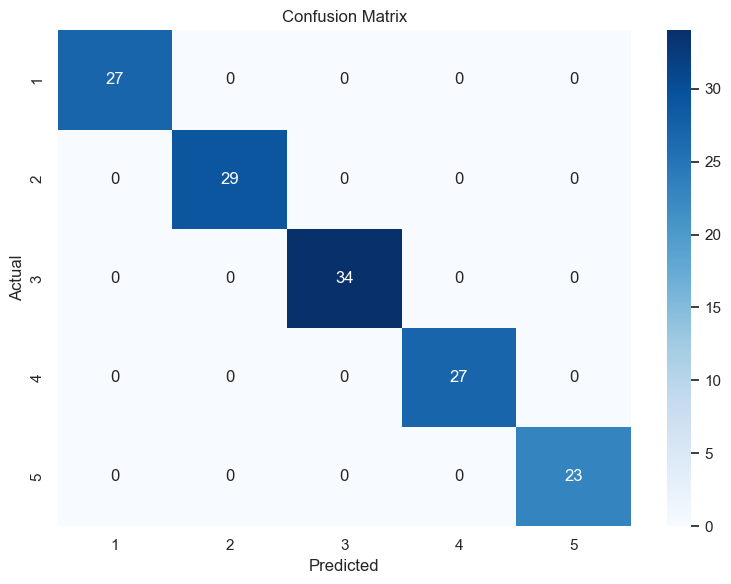

In [73]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# **Feature Importance**
    - Analyze the importance of each feature in predicting the target.

In [23]:
# Step 11: Feature Importance
feature_importances = model.feature_importances_
features = X.columns


C:\Users\vidya\AppData\Local\Temp\ipykernel_31804\2782250981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


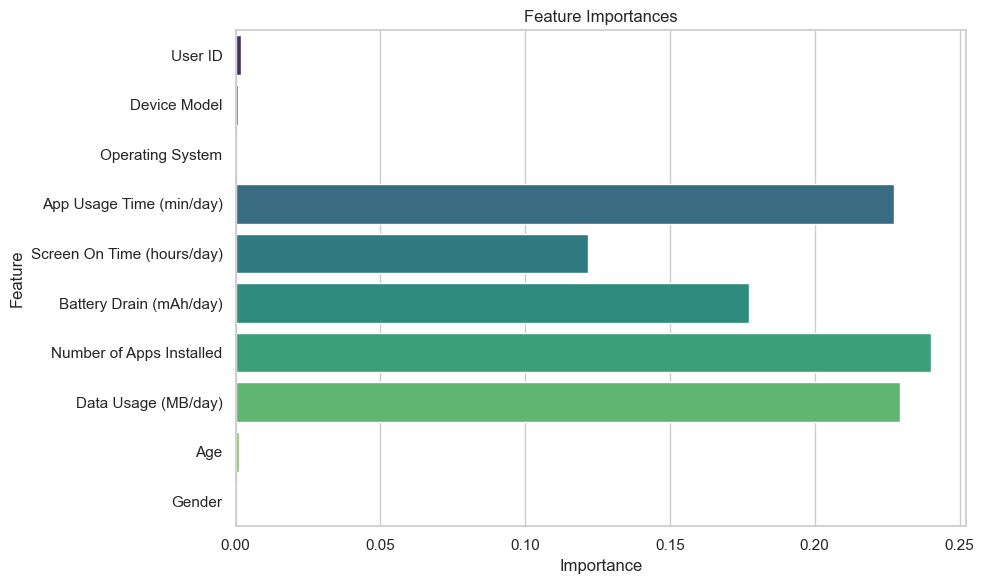

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()
